In [95]:
import pandas as pd
import sklearn
import numpy
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
import scipy

In [96]:
# import the train and test datasets
X_train = pd.read_csv('data/dengue_features_train.csv')
y_train = pd.read_csv('data/dengue_labels_train.csv')
X_test = pd.read_csv('data/dengue_features_test.csv')

In [97]:
X_train.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8


In [98]:
X_test.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,2008,18,2008-04-29,-0.0189,-0.018900,0.102729,0.091200,78.60,298.492857,...,25.37,78.781429,78.60,15.918571,3.128571,26.528571,7.057143,33.3,21.7,75.2
1,sj,2008,19,2008-05-06,-0.0180,-0.012400,0.082043,0.072314,12.56,298.475714,...,21.83,78.230000,12.56,15.791429,2.571429,26.071429,5.557143,30.0,22.2,34.3
2,sj,2008,20,2008-05-13,-0.0015,NaN,0.151083,0.091529,3.66,299.455714,...,4.12,78.270000,3.66,16.674286,4.428571,27.928571,7.785714,32.8,22.8,3.0
3,sj,2008,21,2008-05-20,NaN,-0.019867,0.124329,0.125686,0.00,299.690000,...,2.20,73.015714,0.00,15.775714,4.342857,28.057143,6.271429,33.3,24.4,0.3
4,sj,2008,22,2008-05-27,0.0568,0.039833,0.062267,0.075914,0.76,299.780000,...,4.36,74.084286,0.76,16.137143,3.542857,27.614286,7.085714,33.3,23.3,84.1


In [99]:
y_train.head()

,city,year,weekofyear,total_cases
0,sj,1990,18,4
1,sj,1990,19,5
2,sj,1990,20,4
3,sj,1990,21,3
4,sj,1990,22,6


In [100]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456 entries, 0 to 1455
Data columns (total 24 columns):
city                                     1456 non-null object
year                                     1456 non-null int64
weekofyear                               1456 non-null int64
week_start_date                          1456 non-null object
ndvi_ne                                  1262 non-null float64
ndvi_nw                                  1404 non-null float64
ndvi_se                                  1434 non-null float64
ndvi_sw                                  1434 non-null float64
precipitation_amt_mm                     1443 non-null float64
reanalysis_air_temp_k                    1446 non-null float64
reanalysis_avg_temp_k                    1446 non-null float64
reanalysis_dew_point_temp_k              1446 non-null float64
reanalysis_max_air_temp_k                1446 non-null float64
reanalysis_min_air_temp_k                1446 non-null float64
reanalysis_precip

In [101]:
# add 'week_start_date' to the y_train dataset from the X_train dataset
y_train = y_train.merge(X_train[['city','year','weekofyear','week_start_date']], left_on = ['city','year','weekofyear'], right_on = ['city','year','weekofyear'])

In [102]:
# split the dataset by the cities

X_train_sj = X_train.loc[X_train['city']=='sj']
X_train_iq = X_train.loc[X_train['city']=='iq']
y_train_sj = y_train.loc[y_train['city']=='sj']
y_train_iq = y_train.loc[y_train['city']=='iq']

In [103]:
# change format of the 'week_start_date' column to datetime64[ns]
y_train_sj['week_start_date'] =pd.to_datetime(y_train_sj['week_start_date'])

C:\Users\hsg82\AppData\Local\Continuum\anaconda3\envs\data_basic\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [104]:
y_train_sj.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 936 entries, 0 to 935
Data columns (total 5 columns):
city               936 non-null object
year               936 non-null int64
weekofyear         936 non-null int64
total_cases        936 non-null int64
week_start_date    936 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 43.9+ KB


In [105]:
y_train_season_sj = y_train_sj[['week_start_date','total_cases']].set_index('week_start_date')

In [106]:
y_train_season_iq = y_train_iq[['week_start_date','total_cases']].set_index('week_start_date')

<Figure size 1080x720 with 0 Axes>

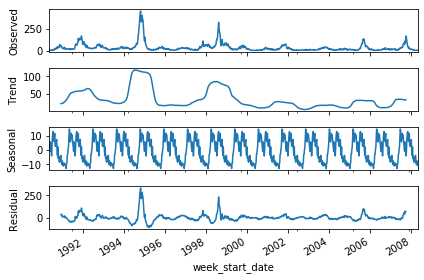

In [107]:
res = seasonal_decompose(y_train_season_sj,model='additive',freq=60)
plt.figure(figsize=(15,10))
res.plot()
plt.show()

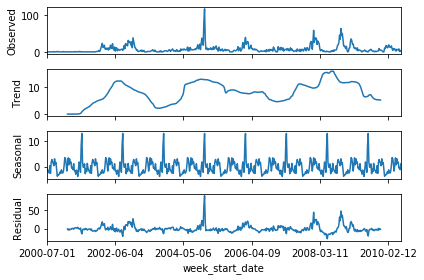

In [108]:
res = seasonal_decompose(y_train_season_iq,model='additive',freq=60)
res.plot()
plt.show()

In [109]:
import statsmodels.formula.api as smf

In [110]:
X_train_sj['week_start_date'] =pd.to_datetime(X_train_sj['week_start_date'])
X_train_sj = X_train_sj.set_index('week_start_date')
X_train_sj = X_train_sj.drop(['city','year','weekofyear'], axis=1)

C:\Users\hsg82\AppData\Local\Continuum\anaconda3\envs\data_basic\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [112]:
X_train_sj = X_train_sj.interpolate()
X_train_sj = X_train_sj.merge(y_train_season_sj,left_index=True, right_index=True)

In [119]:
lm = smf.ols(formula='total_cases~'+'+'.join(X_train_sj.columns[:-1]), data = X_train_sj).fit()

In [120]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:            total_cases   R-squared:                       0.109
Model:                            OLS   Adj. R-squared:                  0.091
Method:                 Least Squares   F-statistic:                     5.900
Date:                Fri, 27 Mar 2020   Prob (F-statistic):           3.18e-14
Time:                        14:46:09   Log-Likelihood:                -4960.8
No. Observations:                 936   AIC:                             9962.
Df Residuals:                     916   BIC:                         1.006e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [121]:
X_train_iq['week_start_date'] =pd.to_datetime(X_train_iq['week_start_date'])
X_train_iq = X_train_iq.set_index('week_start_date')
X_train_iq = X_train_iq.drop(['city','year','weekofyear'], axis=1)

C:\Users\hsg82\AppData\Local\Continuum\anaconda3\envs\data_basic\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [122]:
X_train_iq = X_train_iq.interpolate()
X_train_iq = X_train_iq.merge(y_train_season_iq,left_index=True, right_index=True)

In [123]:
lm = smf.ols(formula='total_cases~'+'+'.join(X_train_sj.columns[:-1]), data = X_train_iq).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:            total_cases   R-squared:                       0.088
Model:                            OLS   Adj. R-squared:                  0.054
Method:                 Least Squares   F-statistic:                     2.545
Date:                Fri, 27 Mar 2020   Prob (F-statistic):           0.000366
Time:                        14:47:55   Log-Likelihood:                -1949.0
No. Observations:                 520   AIC:                             3938.
Df Residuals:                     500   BIC:                             4023.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------